In [3]:
from tsp_annealing import *
import matplotlib.pyplot as plt

In [5]:
def plot_TSP_solution(cities, permutation_method, solution=None, **kwargs):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, 
                                                                    altering_method=permutation_method, **kwargs)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()



def metrics(cities, permutation_method):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, altering_method=permutation_method, max_iterations=int(1E5), alpha=0.9999)

    best_tour_coordinates = tour_to_cities(best_tour, cities)

    print('Method = \'%s\''%(permutation_method))
    print("Best distance:", best_tour_distance)
    print('With %i intersections \n'%(count_intersections(best_tour_coordinates)))



In [6]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
# plot_TSP_solution(cities, 'swap')
# plot_TSP_solution(cities, 'reverse')
# plot_TSP_solution(cities, 'insert')

metrics(cities, 'reverse')
metrics(cities, 'insert')

Method = 'reverse'
Best distance: 444.6660123834507
With 0 intersections 

Method = 'insert'
Best distance: 464.9292054590008
With 1 intersections 



In [7]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')
# plot_TSP_solution(cities, 'swap')
# plot_TSP_solution(cities, 'reverse')

metrics(cities, 'swap')
metrics(cities, 'reverse')
metrics(cities, 'insert')


Method = 'swap'
Best distance: 7604.109427441747
With 309 intersections 

Method = 'reverse'
Best distance: 4026.121817751674
With 50 intersections 

Method = 'insert'
Best distance: 6457.224153421063
With 228 intersections 



Best tour: [21 30 27  2 28 20 49 33 29  9 38 32 44 14 16  3 46 11 50 45 10 37 15  8
 48  4 36 43 41 18 39 40 12 17 24 13  5 26 47 23 42 22  6 25  7 35 34 19
  1 31  0]
Best distance: 491.9813648653819


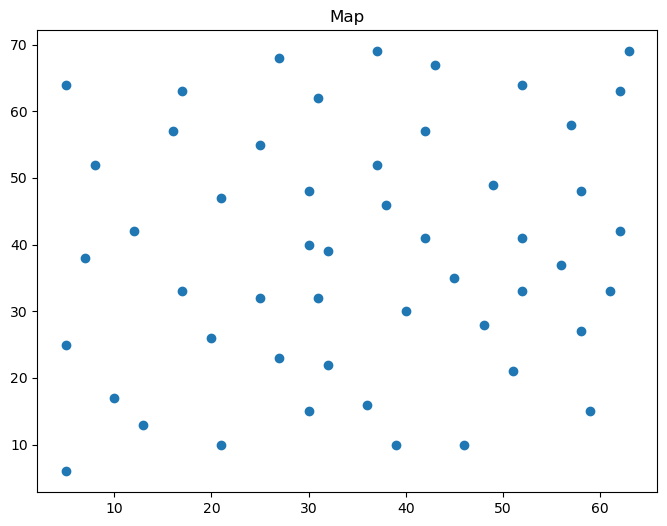

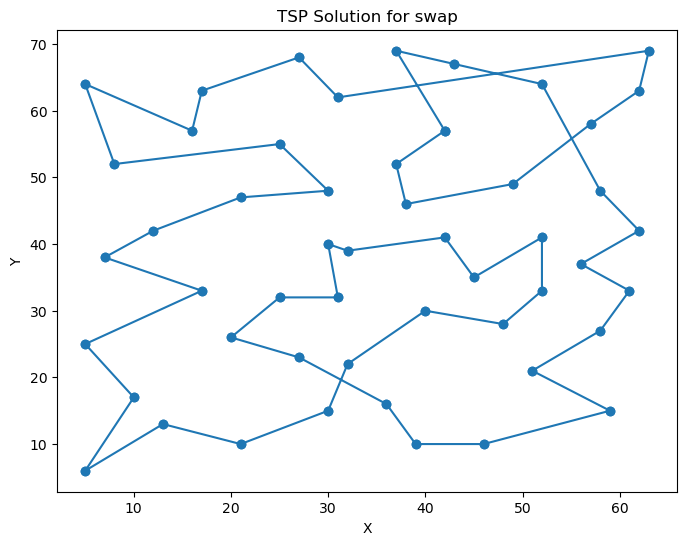

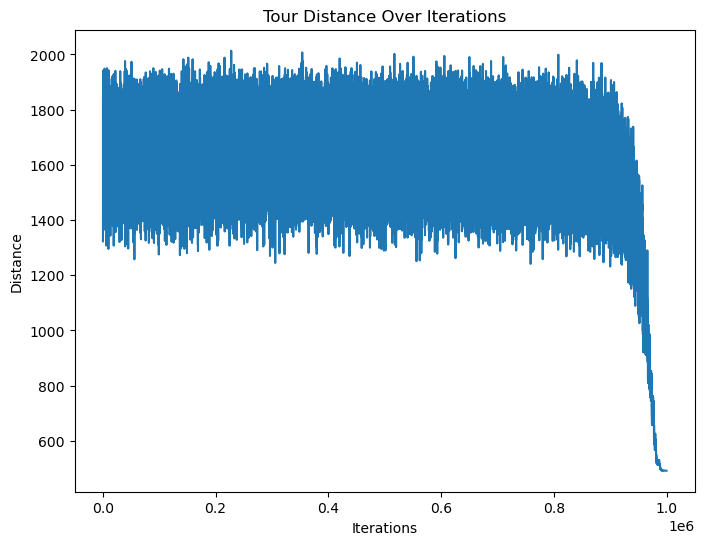

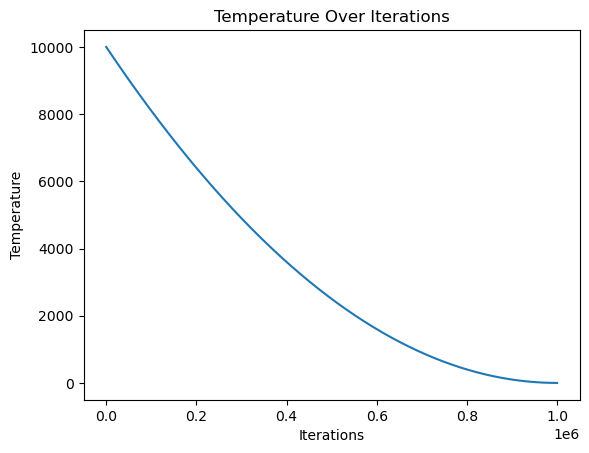

Best tour: [22, 6, 42, 23, 13, 24, 17, 46, 3, 12, 40, 39, 18, 41, 43, 16, 36, 14, 44, 32, 38, 9, 48, 37, 10, 4, 11, 45, 50, 26, 31, 0, 21, 1, 15, 49, 8, 29, 33, 20, 28, 19, 34, 35, 2, 27, 30, 25, 7, 47, 5]
Best distance: 439.92871394111916


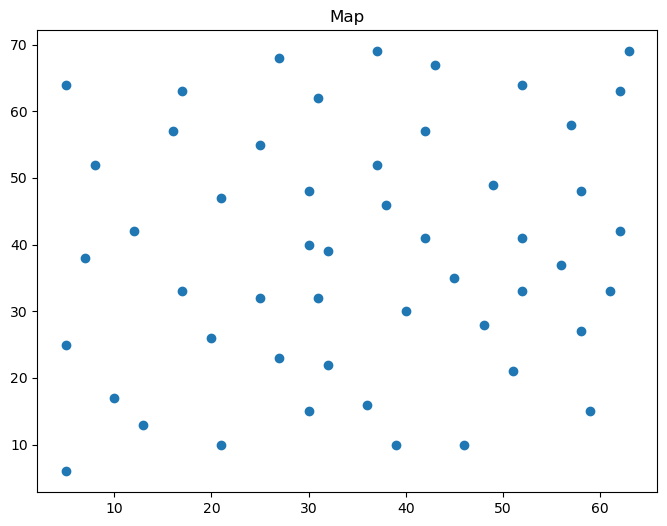

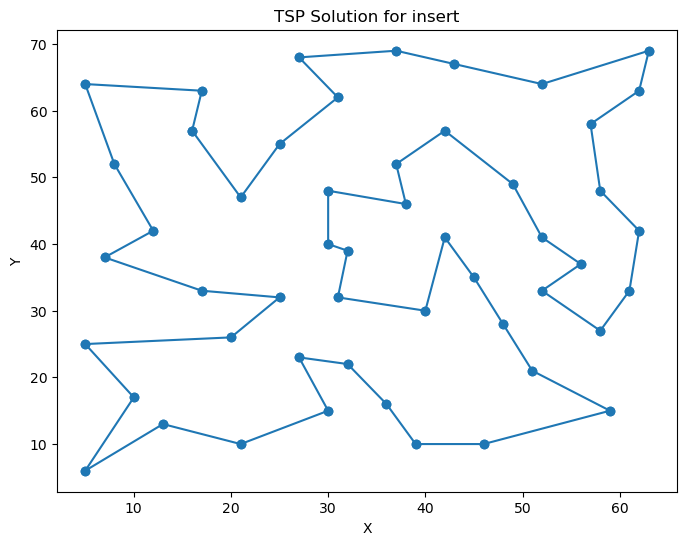

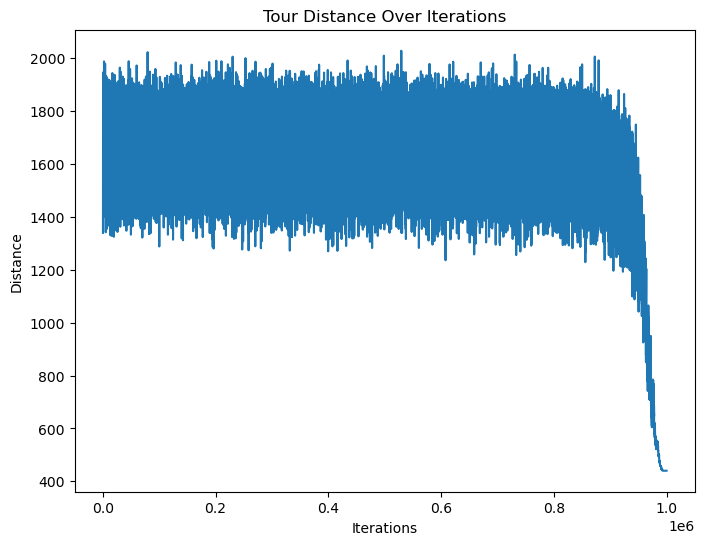

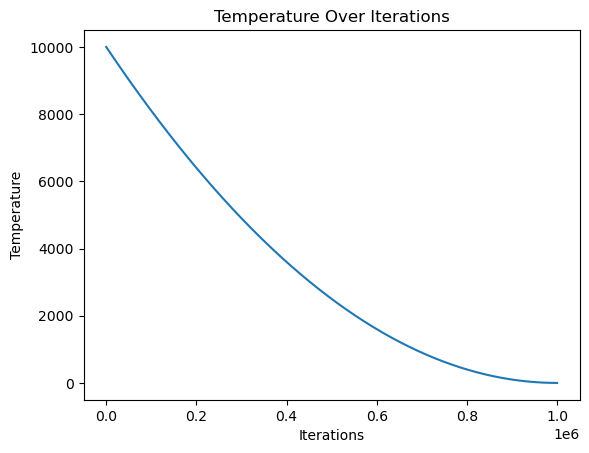

Best tour: [12 40 39 18 41 43 16 36 14 44 32 38  9 29 33 20 28 19 34 35  2 27 30 25
  7 47 22  6 42 23  5 26 50 45 10 31  0 21  1 15 49  8 48 37  4 11 46  3
 17 13 24]
Best distance: 434.0135684806209


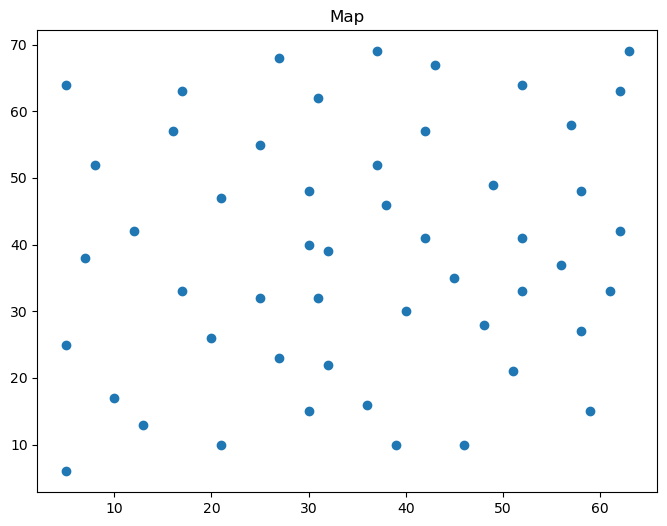

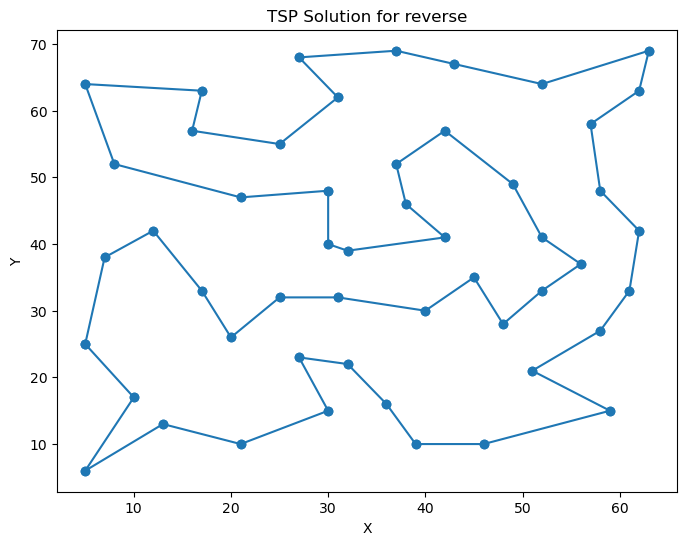

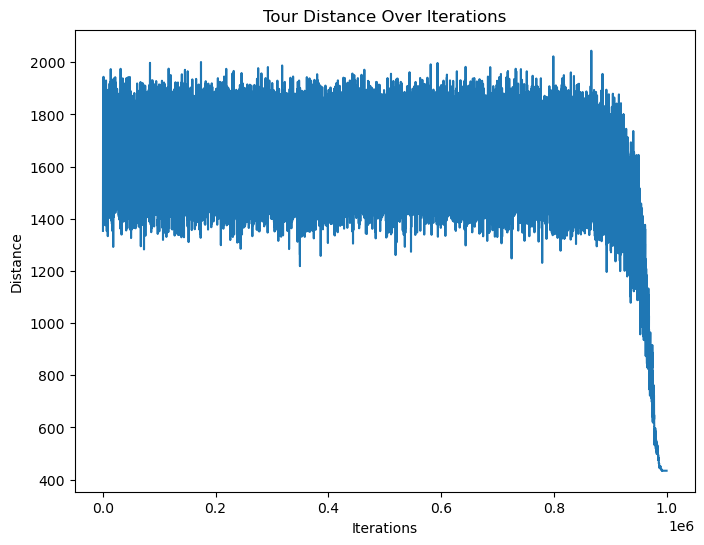

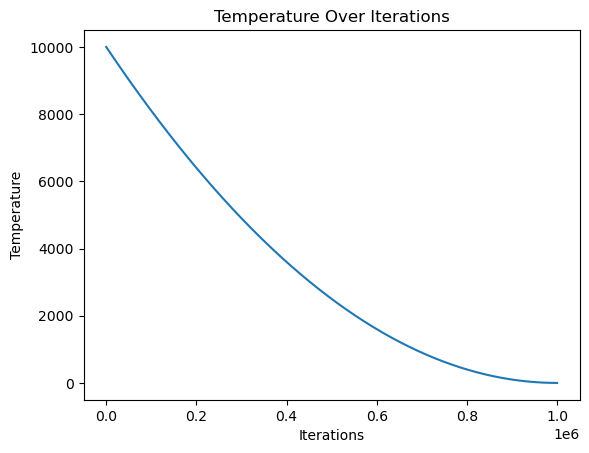

In [14]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

max_iterations = int(1E6) 
final_temp = 1E-6
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-7

plot_TSP_solution(cities, 'swap',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha)
plot_TSP_solution(cities, 'insert',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha)
plot_TSP_solution(cities, 'reverse',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha)

In [9]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)

num_runs = 50
run_simulations(num_runs=num_runs, distances=distances, output='fitness_statistics')

(600.7399360697783, 32.334519597538154, (591.4572718123043, 610.0226003272523))

In [10]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)
max_iterations_list = range(100, 20000, 1000)
means, stds, conf_intervals = run_vary_maxiter(num_runs, distances, max_iterations_list)

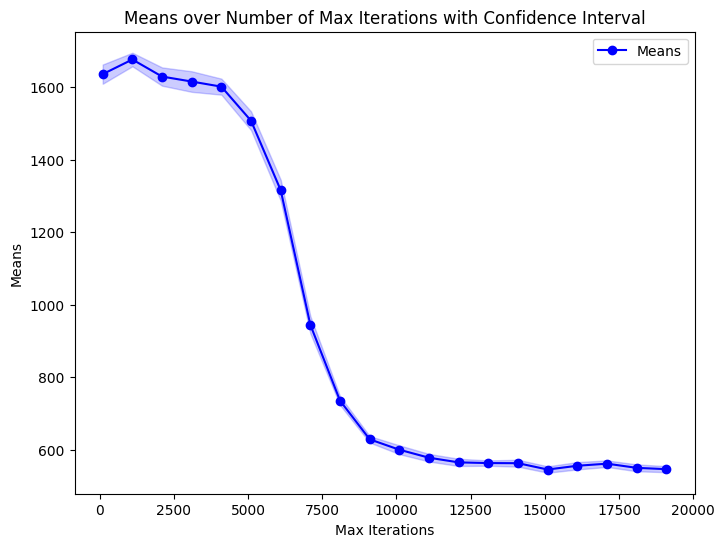

In [11]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Means')
plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.2, color='blue')


plt.title('Means over Number of Max Iterations with Confidence Interval')
plt.xlabel('Max Iterations')
plt.ylabel('Means')
plt.legend()

plt.show()


In [8]:
""" Concurrency test """

cities = load_graph('TSP-Configurations/eil51.tsp.txt')
max_iterations = int(1E6)
final_temp = 1E-6
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-7
distances = calculate_distances(cities)

annealing_kwargs = {
    'distances': distances,
    'altering_method': 'swap',
    'max_iterations': max_iterations,
    'final_temp': final_temp,
    'cooling_schedule': cooling_schedule,
    'alpha': alpha
}

run_concurrent(perform_annealing, **annealing_kwargs)


start_time = time.time()
perform_annealing(**annealing_kwargs)
perform_annealing(**annealing_kwargs)
perform_annealing(**annealing_kwargs)
end_time = time.time()
print('Time taken with NO concurrency', end_time - start_time)


Time taken with concurrency: 17.70518684387207 seconds
Time taken with NO concurrency 43.018882036209106
